In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][0:] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
pretty_print_review_and_label(1)

NEGATIVE	:	story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane  violent mob by the crazy chantings of it  s singers . unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting . even those from the era should be turned off . the cryptic dialogue would make shakespeare seem easy to a third grader . on a technical level it  s better than you might think with some good cinematography by future great vilmos zsigmond . future stars sally kirkland and frederic forrest can be seen briefly .  ...


In [3]:
len(reviews)

25000

In [4]:
len(labels)

25000

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretation e direction . not look       ...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more depressing than this . movie rating     music rating       ...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about   years ago  and i  m still screwed up from it .  ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both entertaining and educating .  br    br   i didn  t know what a weather girl was before i learned it here .  ...


In [6]:
from collections import Counter
import numpy as np 

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()


In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word]  += 1
            

In [9]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

In [11]:
pos_neg_ratios =  Counter()

In [12]:
for term,cnt in list(total_counts.most_common()):
    if(cnt > 10):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio
for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log(1/(ratio+0.01))

In [13]:
pos_neg_ratios

Counter({'': -0.009628978766657269,
         'the': 0.05902269426102881,
         '.': -0.03776798438291608,
         'and': 0.18744824888788403,
         'a': 0.0535800803860054,
         'of': 0.10766910804438501,
         'to': -0.02256882737536294,
         'is': 0.13363870656907434,
         'br': -0.05619911120896262,
         'it': 0.003723402185199498,
         'in': 0.13773074964958743,
         'i': -0.12888761033475718,
         'this': -0.1424146720933266,
         'that': -0.04373945686832883,
         's': 0.06942599372398499,
         'was': -0.17007733533863434,
         'as': 0.24332065954522725,
         'for': 0.0220106305941666,
         'with': 0.10743222230268429,
         'movie': -0.2561846473923777,
         'but': -0.03466710795366085,
         'film': 0.08561855565085673,
         'you': -0.04031761082192385,
         'on': -0.0007604821951400942,
         't': -0.3800837401165488,
         'not': -0.12483974676548956,
         'he': 0.16126968303520792,
    

In [14]:
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('rosarios', -4.605170185988092),
 ('frewer', -4.605170185988092),
 ('manu', -4.605170185988092),
 ('borel', -4.605170185988092),
 ('swinton', -4.605170185988092),
 ('sagemiller', -4.605170185988092),
 ('summersisle', -4.605170185988092),
 ('qi', -4.605170185988092),
 ('redline', -4.605170185988092),
 ('slipstream', -4.605170185988092),
 ('bolo', -4.605170185988092),
 ('emraan', -4.605170185988092),
 ('geico', -4.605170185988092),
 ('cato', -4.605170185988092),
 ('liliom', -4.605170185988092),
 ('rajni', -4.605170185988092),
 ('mayeda', -4.605170185988092),
 ('crapfest', -4.605170185988092),
 ('tmtm', -4.605170185988092),
 ('sued', -4.605170185988092),
 ('keyes', -4.605170185988092),
 ('nichole', -4.605170185988092),
 ('straightheads', -4.605170185988092),
 ('aluminium', -4.605170185988092),
 ('groaning', -4.605170185988092),
 ('templars', -4.605170185988092),
 ('krista', -4.605170185988092),
 ('spandex', -4.605170185988092),
 ('unisols', -4.605170185988092),
 ('mache', -4.60517018598

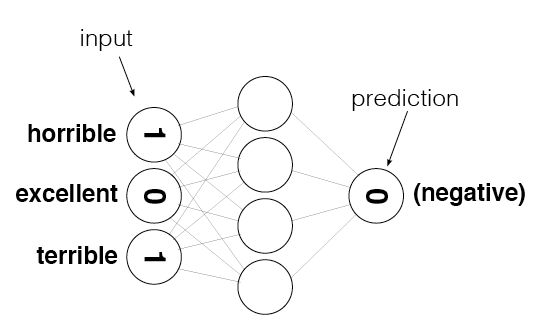

In [15]:
from IPython.display import Image
review = "Thsi was a horrible movie"
Image(filename="sentiment_network.png")

In [16]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [17]:
import numpy as np
layer_0 = np.zeros((1,vocab_size))
layer_0

array([[0., 0., 0., ..., 0., 0., 0.]])

In [18]:
word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i
    
word2index

{'': 0,
 'alluded': 1,
 'concocting': 2,
 'faruza': 3,
 'meudon': 4,
 'labeled': 5,
 'intersperses': 6,
 'dread': 7,
 'gambles': 8,
 'abos': 9,
 'nuristanis': 10,
 'panzram': 11,
 'dawid': 12,
 'wrangle': 13,
 'listened': 14,
 'oxide': 15,
 'nolin': 16,
 'phineas': 17,
 'norton': 18,
 'unreasoning': 19,
 'rewording': 20,
 'tombstone': 21,
 'flophouse': 22,
 'britain': 23,
 'clutches': 24,
 'recants': 25,
 'bowen': 26,
 'unbearded': 27,
 'goren': 28,
 'defensible': 29,
 'bruijning': 30,
 'shintaro': 31,
 'bying': 32,
 'wannabee': 33,
 'argument': 34,
 'relegated': 35,
 'neighbourliness': 36,
 'ingrid': 37,
 'suzanne': 38,
 'bood': 39,
 'coloring': 40,
 'woad': 41,
 'footwork': 42,
 'pointe': 43,
 'whuppin': 44,
 'anthropomorphised': 45,
 'core': 46,
 'ruskin': 47,
 'dementing': 48,
 'goddamit': 49,
 'cost': 50,
 'sierras': 51,
 'clooney': 52,
 'madcap': 53,
 'neville': 54,
 'johnsons': 55,
 'randle': 56,
 'fillers': 57,
 'greenscreens': 58,
 'definite': 59,
 'ogden': 60,
 'personificati

In [19]:
def update_input_layer(review):
    global layer_0
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1
update_input_layer(reviews[0])

In [20]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [21]:
def get_target_for_label(label):
    if(label) == 'POSITIVE':
        return 1
    else:
        return 0

In [22]:
get_target_for_label(labels[0])
get_target_for_label(labels[1])

0

In [23]:
import time
import os,sys 
import numpy as np


In [37]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation. 
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [38]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [39]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):301.0 #Correct:1251 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):284.9 #Correct:2501 #Trained:5001 Training Accuracy:50.0%
Progress:31.2% Speed(reviews/sec):280.8 #Correct:3751 #Trained:7501 Training Accuracy:50.0%
Progress:41.6% Speed(reviews/sec):280.2 #Correct:5001 #Trained:10001 Training Accuracy:50.0%
Progress:52.0% Speed(reviews/sec):283.4 #Correct:6251 #Trained:12501 Training Accuracy:50.0%
Progress:62.5% Speed(reviews/sec):285.6 #Correct:7501 #Trained:15001 Training Accuracy:50.0%
Progress:72.9% Speed(reviews/sec):287.1 #Correct:8751 #Trained:17501 Training Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):287.9 #Correct:10001 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):288.3 #Correct:11251 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):288.8 #Correct:12000 #Trained:24000 Training Ac

#It dint work because the learning rate is too high! why ? 


In [41]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):297.9 #Correct:1248 #Trained:2501 Training Accuracy:49.9%
Progress:18.3% Speed(reviews/sec):292.8 #Correct:2195 #Trained:4395 Training Accuracy:49.9%

KeyboardInterrupt: 

In [42]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):287.6 #Correct:1264 #Trained:2501 Training Accuracy:50.5%
Progress:20.8% Speed(reviews/sec):281.1 #Correct:2624 #Trained:5001 Training Accuracy:52.4%
Progress:31.2% Speed(reviews/sec):279.8 #Correct:4077 #Trained:7501 Training Accuracy:54.3%
Progress:41.6% Speed(reviews/sec):280.4 #Correct:5664 #Trained:10001 Training Accuracy:56.6%
Progress:52.0% Speed(reviews/sec):279.2 #Correct:7238 #Trained:12501 Training Accuracy:57.8%
Progress:62.5% Speed(reviews/sec):277.6 #Correct:8836 #Trained:15001 Training Accuracy:58.9%
Progress:72.9% Speed(reviews/sec):278.0 #Correct:10421 #Trained:17501 Training Accuracy:59.5%
Progress:83.3% Speed(reviews/sec):278.3 #Correct:12142 #Trained:20001 Training Accuracy:60.7%
Progress:93.7% Speed(reviews/sec):279.3 #Correct:13872 #Trained:22501 Training Accuracy:61.6%
Progress:99.9% Speed(reviews/sec):280.5 #Correct:14895 #Trained:24000 Training A

In [45]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation. 
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                ## New for Project 4: changed to set to 1 instead of add 1
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [46]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:21.7% Speed(reviews/sec):1082. #Correct:109 #Tested:218 Testing Accuracy:50.0%

Progress:49.1% Speed(reviews/sec):1221. #Correct:246 #Tested:492 Testing Accuracy:50.0%

Progress:79.2% Speed(reviews/sec):1313. #Correct:397 #Tested:793 Testing Accuracy:50.0%

Progress:99.9% Speed(reviews/sec):1344. #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [47]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):336.5 #Correct:1824 #Trained:2501 Training Accuracy:72.9%
Progress:20.8% Speed(reviews/sec):316.7 #Correct:3805 #Trained:5001 Training Accuracy:76.0%
Progress:31.2% Speed(reviews/sec):292.8 #Correct:5910 #Trained:7501 Training Accuracy:78.7%
Progress:41.6% Speed(reviews/sec):292.2 #Correct:8044 #Trained:10001 Training Accuracy:80.4%
Progress:52.0% Speed(reviews/sec):291.1 #Correct:10173 #Trained:12501 Training Accuracy:81.3%
Progress:62.5% Speed(reviews/sec):289.1 #Correct:12303 #Trained:15001 Training Accuracy:82.0%
Progress:72.9% Speed(reviews/sec):287.6 #Correct:14425 #Trained:17501 Training Accuracy:82.4%
Progress:83.3% Speed(reviews/sec):287.8 #Correct:16600 #Trained:20001 Training Accuracy:82.9%
Progress:93.7% Speed(reviews/sec):285.6 #Correct:18786 #Trained:22501 Training Accuracy:83.4%
Progress:99.9% Speed(reviews/sec):284.8 #Correct:20108 #Trained:24000 Training

In [48]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):301.4 #Correct:1962 #Trained:2501 Training Accuracy:78.4%
Progress:20.8% Speed(reviews/sec):302.5 #Correct:4002 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):297.3 #Correct:6120 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):299.5 #Correct:8271 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):300.1 #Correct:10431 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):301.0 #Correct:12565 #Trained:15001 Training Accuracy:83.7%
Progress:72.9% Speed(reviews/sec):301.5 #Correct:14670 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):301.8 #Correct:16833 #Trained:20001 Training Accuracy:84.1%
Progress:93.7% Speed(reviews/sec):301.7 #Correct:19015 #Trained:22501 Training Accuracy:84.5%
Progress:99.9% Speed(reviews/sec):301.9 #Correct:20335 #Trained:24000 Training

In [49]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):267.8 #Correct:1941 #Trained:2501 Training Accuracy:77.6%
Progress:20.8% Speed(reviews/sec):279.0 #Correct:3988 #Trained:5001 Training Accuracy:79.7%
Progress:31.2% Speed(reviews/sec):283.9 #Correct:6086 #Trained:7501 Training Accuracy:81.1%
Progress:41.6% Speed(reviews/sec):286.0 #Correct:8205 #Trained:10001 Training Accuracy:82.0%
Progress:52.0% Speed(reviews/sec):288.4 #Correct:10338 #Trained:12501 Training Accuracy:82.6%
Progress:62.5% Speed(reviews/sec):288.0 #Correct:12424 #Trained:15001 Training Accuracy:82.8%
Progress:72.9% Speed(reviews/sec):289.6 #Correct:14525 #Trained:17501 Training Accuracy:82.9%
Progress:83.3% Speed(reviews/sec):290.8 #Correct:16698 #Trained:20001 Training Accuracy:83.4%
Progress:93.7% Speed(reviews/sec):291.5 #Correct:18857 #Trained:22501 Training Accuracy:83.8%
Progress:99.9% Speed(reviews/sec):292.2 #Correct:20173 #Trained:24000 Training